In [1]:
import sys

In [2]:
sys.path.append('../src/')

In [3]:
from util.parse_time import order_based_on_file_timestamp, parseTime, get_next_sequence

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
len([x for x in range(0, 24 * 60, 15)])

96

In [6]:
[x for x in range(5, 24 * 60, 5)]

[5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495,
 500,
 505,
 510,
 515,
 520,
 525,
 530,
 535,
 540,
 545,
 550,
 555,
 560,
 565,
 570,
 575,
 580,
 585,
 590,
 595,
 600,
 605,
 610,
 615,
 620,
 625,
 630,
 635,
 640,
 645,
 650,
 655,
 660,
 665,
 670,
 675,
 680,
 685,
 690,
 695,
 700,
 705,
 710,
 715,
 720,
 725,
 730,
 735,
 740,
 745,
 750,
 755,
 760,
 765,
 770,
 775,
 780,
 785,
 790,
 795,
 800,
 805,
 810,
 815,
 820,
 825,
 830,
 835,
 840,
 845,
 850,


In [9]:
satellite_seq_len = 5

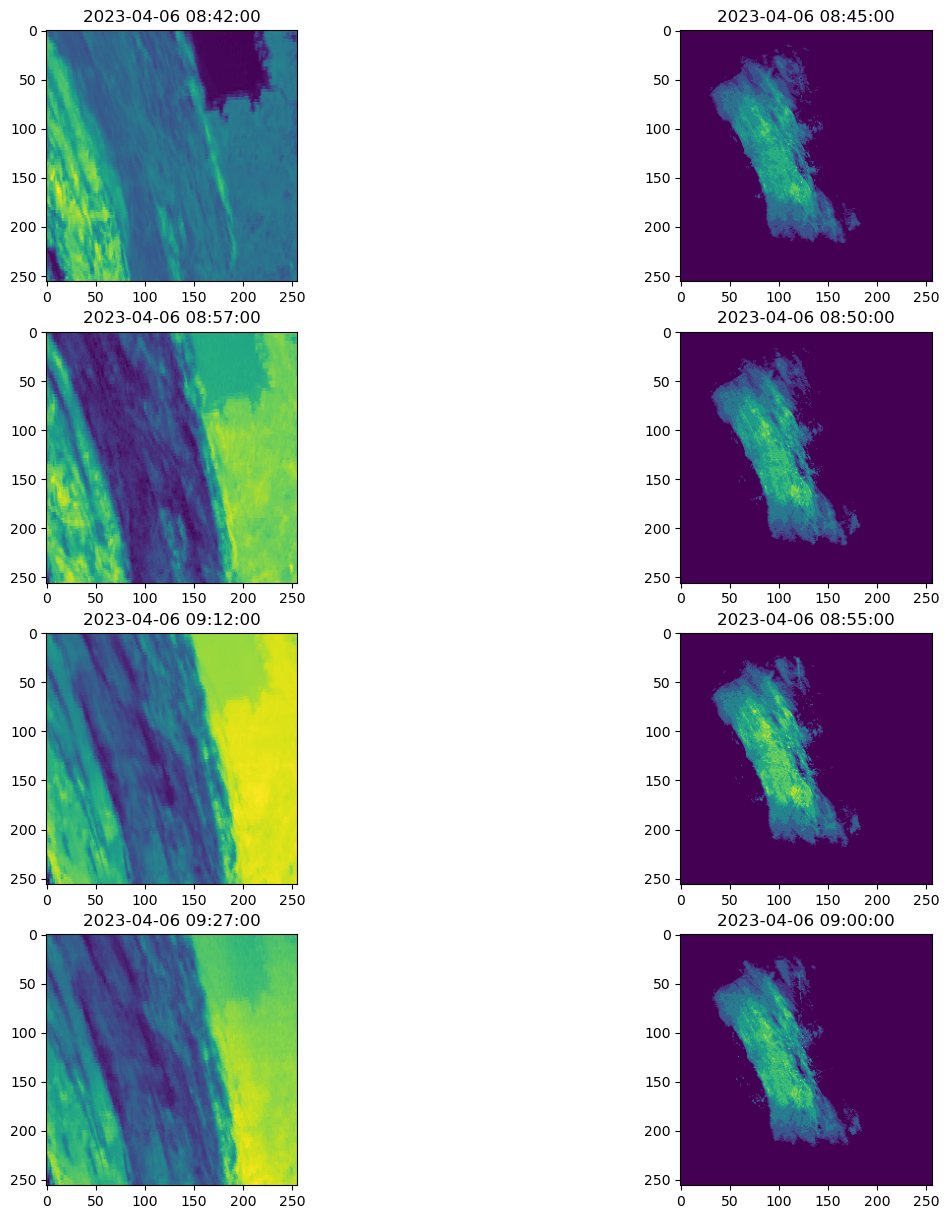

In [24]:
start = 500
sat = order_based_on_file_timestamp(os.listdir('../data/preprocessed/satellite/'))
rad = order_based_on_file_timestamp(os.listdir('../data/preprocessed/radar/'))
imagesSat = [np.load(os.path.join('../data/preprocessed/satellite/', x)) for x in sat[start:start+4]]
radStart, radEnd = get_next_sequence(4, sat[start], rad)
imagesRad = [np.load(os.path.join('../data/preprocessed/radar/', x)) for x in rad[radStart:radStart+4]]
namesSat = [x for x in sat[start:start+4]]
namesRad = [x for x in rad[radStart:radStart+4]]
fig, axes = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        source = imagesSat[:][0] if j % 2 == 0 else imagesRad
        names = namesSat if j % 2 == 0 else namesRad

        axes[i][j].set_title(parseTime(names[i]))
        axes[i][j].imshow(source[i])

upper bound sat 2023-04-01 02:27:00


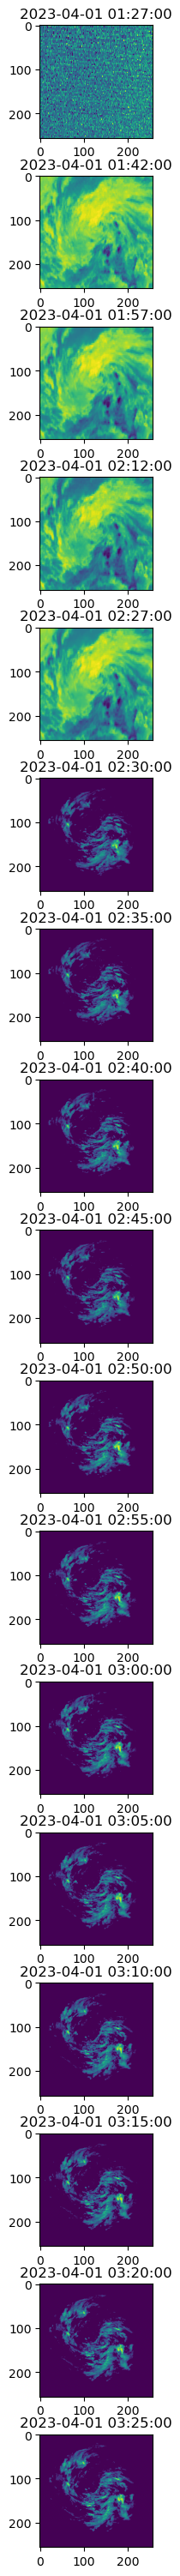

In [39]:
index = 1

lower_bound_satellite = index * satellite_seq_len
upper_bound_satellite = (index + 1) * satellite_seq_len

start = 400

sat = order_based_on_file_timestamp(os.listdir('../data/preprocessed/satellite/'))
rad = order_based_on_file_timestamp(os.listdir('../data/preprocessed/radar/'))

imagesSat = [np.load(os.path.join('../data/preprocessed/satellite/', x)) for x in sat[lower_bound_satellite:upper_bound_satellite]]

print("upper bound sat", parseTime(sat[upper_bound_satellite - 1]))
radStart, radEnd = get_next_sequence(12, sat[upper_bound_satellite - 1], rad)

imagesRad = [np.load(os.path.join('../data/preprocessed/radar/', x)) for x in rad[radStart:radEnd]]
namesSat = [x for x in sat[lower_bound_satellite:upper_bound_satellite]]
namesRad = [x for x in rad[radStart:radEnd]]
fig, axes = plt.subplots(12 + 5, 1)
fig.set_figheight(30)
fig.set_figwidth(15)
fig.tight_layout()
for i in range(len(axes)):
    if i < 5:
        source = imagesSat[:][0]
        names = namesSat
        select = i
    else:
        source = imagesRad
        names = namesRad
        select = i - 5

    axes[i].set_title(parseTime(names[select]))
    axes[i].imshow(source[select])